In [ ]:
# Imports
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import re
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.set(font_scale=1.2)

# Data Ingestion and Understanding

In [ ]:
# Read data
df_srx_condo = pd.read_csv("df_srx_Condo.csv")

In [ ]:
df_srx_condo.describe()

,Unnamed: 0,Bathrooms,Tenure,No. of Units,Size,Bedrooms,Built Year,Primary Schools,Groceries & Supermarts,Shopping Malls,Asking
count,3731.000000,3731.000000,3731.000000,3638.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000
mean,1931.558027,2.195122,387.700884,491.192963,1170.425087,2.420531,2008.189761,0.685969,0.547416,0.718175,7055.919841
std,1120.031357,1.122515,419.886771,319.408485,949.460055,1.173568,10.297240,0.372523,0.294816,0.448736,6362.302606
min,0.000000,1.000000,99.000000,11.000000,1.000000,1.000000,1920.000000,0.060000,0.000000,0.030000,1000.000000
25%,959.500000,1.000000,99.000000,231.000000,571.000000,1.000000,2000.000000,0.430000,0.320000,0.370000,3941.428571
50%,1934.000000,2.000000,99.000000,450.000000,970.000000,2.000000,2011.000000,0.610000,0.510000,0.630000,5223.354839
75%,2896.500000,3.000000,999.000000,696.000000,1452.500000,3.000000,2016.000000,0.840000,0.700000,0.955000,7796.000000
max,3872.000000,7.000000,999.000000,1715.000000,8514.000000,6.000000,2022.000000,1.890000,1.930000,1.980000,69000.000000


# Condo

In [ ]:
cat_cols = ['Lease Term', 'District', 'Neighborhood']
num_cols = ['Built Year', 'Tenure', 'Bedrooms', 'Size', 'Bathrooms', 'Primary Schools', 'Groceries & Supermarts', 'Shopping Malls', 'Asking']

## Categorical variables

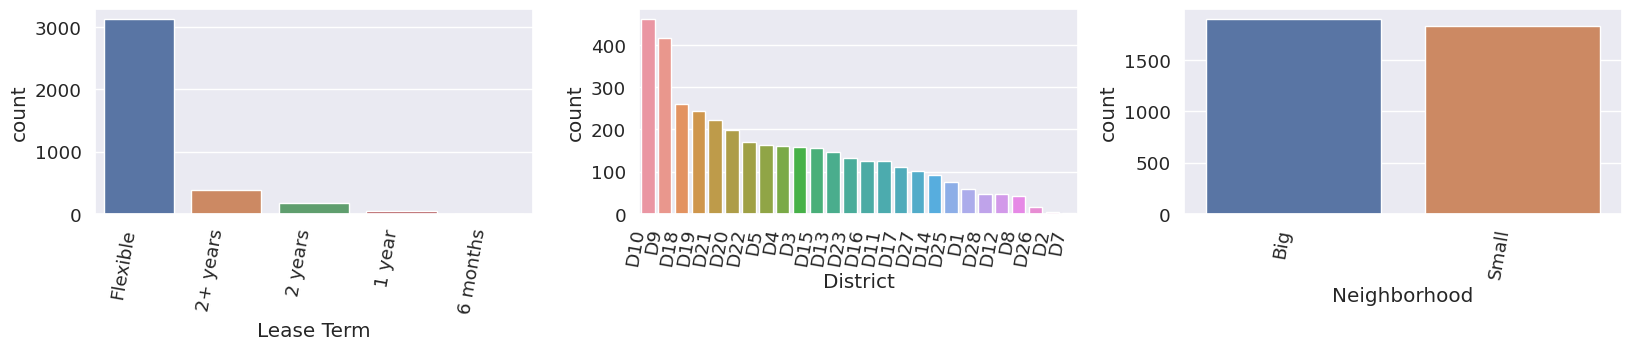

In [ ]:
fig = plt.figure(figsize= (22,6))
for i, col in enumerate(cat_cols):
    ax=fig.add_subplot(2, 4, i+1)
    sns.countplot(x=df_srx_condo[col], ax=ax, order=df_srx_condo[col].value_counts().index)
    plt.xticks(rotation=80, ha='right')
    
fig.tight_layout()  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'D10'),
  Text(1, 0, 'D9'),
  Text(2, 0, 'D18'),
  Text(3, 0, 'D19'),
  Text(4, 0, 'D21'),
  Text(5, 0, 'D20'),
  Text(6, 0, 'D22'),
  Text(7, 0, 'D5'),
  Text(8, 0, 'D4'),
  Text(9, 0, 'D3'),
  Text(10, 0, 'D15'),
  Text(11, 0, 'D13'),
  Text(12, 0, 'D23'),
  Text(13, 0, 'D16'),
  Text(14, 0, 'D11'),
  Text(15, 0, 'D17'),
  Text(16, 0, 'D27'),
  Text(17, 0, 'D14'),
  Text(18, 0, 'D25'),
  Text(19, 0, 'D1'),
  Text(20, 0, 'D28'),
  Text(21, 0, 'D12'),
  Text(22, 0, 'D8'),
  Text(23, 0, 'D26'),
  Text(24, 0, 'D2'),
  Text(25, 0, 'D7')])

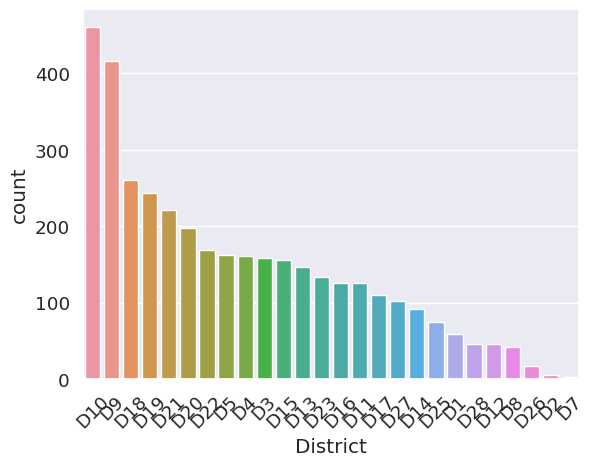

In [ ]:
sns.countplot(x=df_srx_condo['District'], order=df_srx_condo['District'].value_counts().index)
plt.xticks(rotation=45)
# Central districts: 1,2,6,9,10,11

In [ ]:
# Developer
popular_developers = df_srx_condo['Developer'].value_counts()
popular_developers.head(20)

City Developments Ltd                                                         134
Qingjian Realty (Marymount) Pte Ltd                                           119
Keppel Bay Pte Ltd                                                             94
UVD (Projects) Pte. Ltd (UOL Group Ltd/ United Industrial Corporation Ltd)     88
Far East Success                                                               81
Citrine Property Pte Ltd (Oxley Holdings)                                      79
Frasers Centrepoint Homes                                                      74
Far East Organization                                                          65
Tripartite Developers Pte Ltd                                                  58
HDB                                                                            48
Regency Park Pte Ltd                                                           40
Keppel Land, Hong Kong Land, Cheung Kong Holdings Ltd                          37
Golden Developme

In [ ]:
# Trains
trains = df_srx_condo['Trains (MRT & LRT)'].value_counts()
trains.head(20)

NEWTON MRT,DT11               203
ORCHARD BOULEVARD MRT,TE13    153
KING ALBERT PARK MRT,DT6      130
MARYMOUNT MRT,CC16            124
WOODLEIGH MRT,NE11            121
TAMPINES EAST MRT,DT33        109
SOMERSET MRT,NS23             102
GREAT WORLD MRT,TE15           98
CLEMENTI MRT,EW23              90
PASIR RIS MRT,EW1              85
TELOK BLANGAH MRT,CC28         85
LAKESIDE MRT,EW26              80
ORCHARD MRT,NS22               79
FORT CANNING MRT,DT20          64
UPPER CHANGI MRT,DT34          61
DAKOTA MRT,CC8                 61
BEAUTY WORLD MRT,DT5           55
TANAH MERAH MRT,EW4            54
FARRER ROAD MRT,CC20           53
TAMPINES WEST MRT,DT31         52
Name: Trains (MRT & LRT), dtype: int64

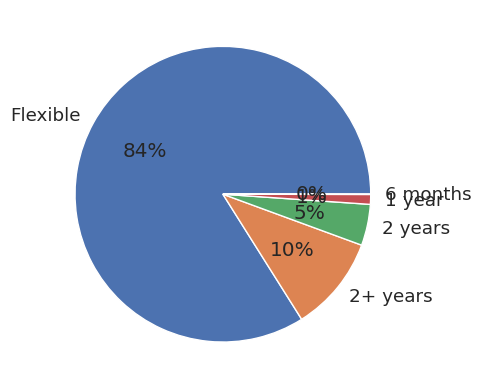

In [ ]:
# Lease Term
lease = df_srx_condo['Lease Term'].value_counts()
plt.pie(lease, labels=lease.index, autopct="%.0f%%");

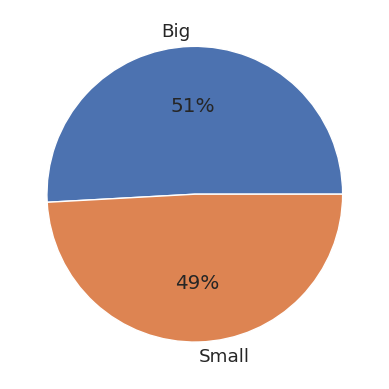

In [ ]:
# Neighborhood
neighborhood = df_srx_condo['Neighborhood'].value_counts()
plt.pie(neighborhood, labels=neighborhood.index, autopct="%.0f%%");

## Numerical variables

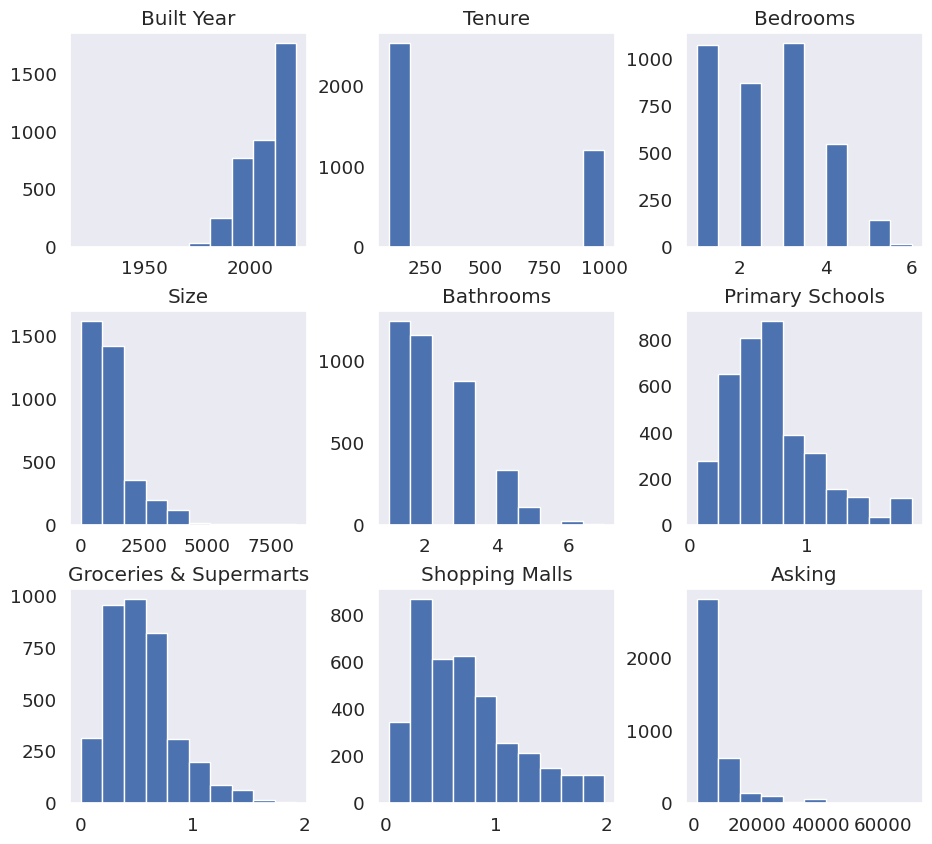

In [ ]:
df_srx_condo[num_cols].hist(bins=10, grid = False, figsize=(11,10));

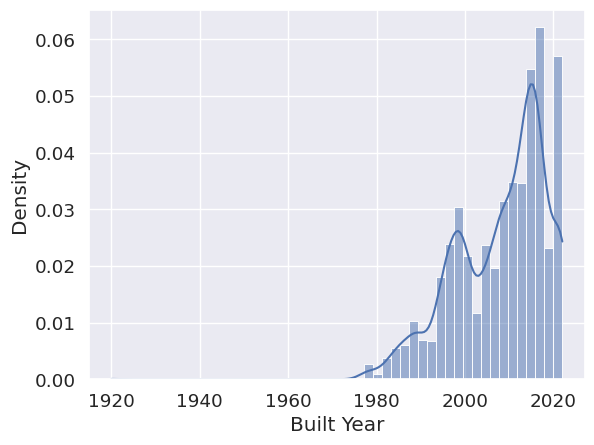

In [ ]:
# Built Year
sns.histplot(df_srx_condo['Built Year'], kde=True, bins='auto', stat = 'density');

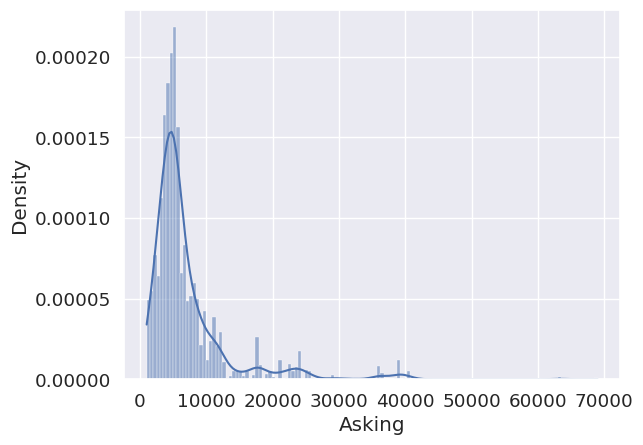

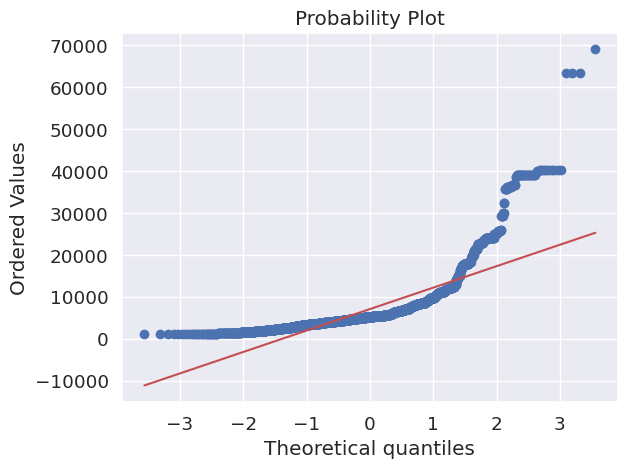

In [ ]:
# Asking
sns.histplot(df_srx_condo['Asking'], kde=True, bins='auto', stat = 'density');
fig = plt.figure()
res = stats.probplot(df_srx_condo['Asking'], plot=plt)

In [ ]:
print("Skewness: %f" % df_srx_condo['Asking'].skew())

Skewness: 3.380784


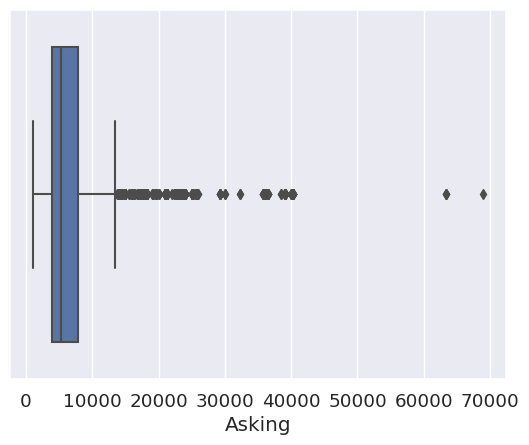

In [ ]:
# Asking
sns.boxplot(x=df_srx_condo['Asking']);

In [ ]:
df_srx_condo['Asking_Log'] = df_srx_condo['Asking'].apply(lambda x: np.log(x))

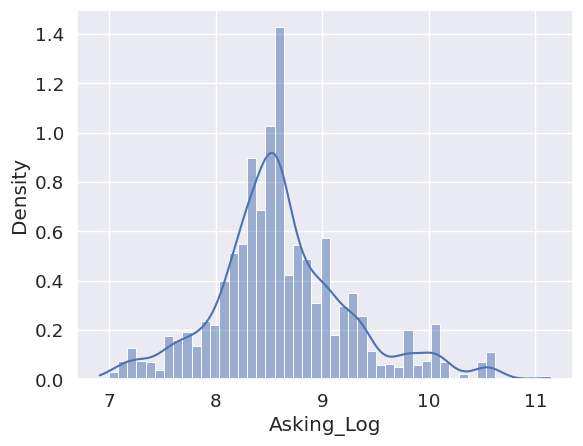

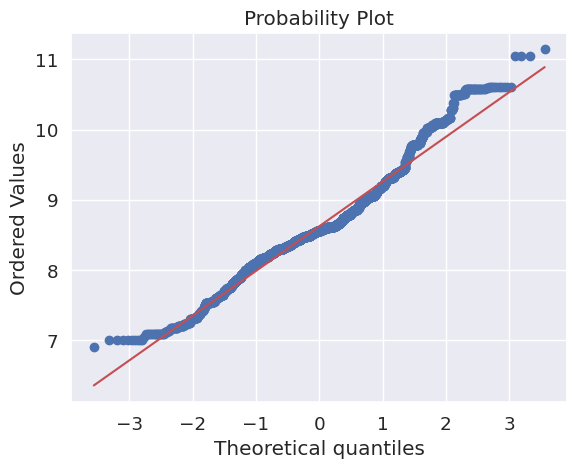

In [ ]:
sns.histplot(df_srx_condo['Asking_Log'], kde=True, bins='auto', stat = 'density');
fig = plt.figure()
res = stats.probplot(df_srx_condo['Asking_Log'], plot=plt)

In [ ]:
print("Skewness: %f" % df_srx_condo['Asking_Log'].skew())

Skewness: 0.532694


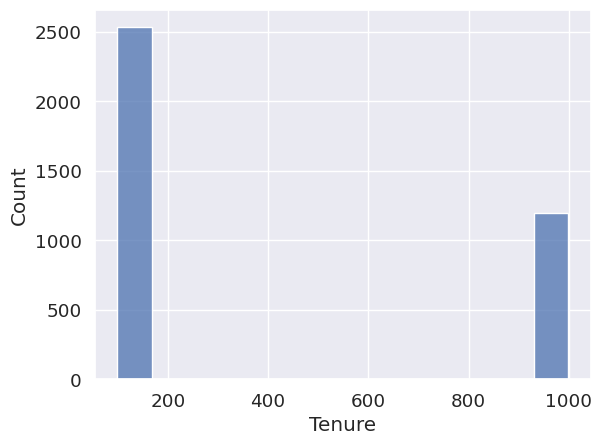

In [ ]:
# Tenure
sns.histplot(x='Tenure', data = df_srx_condo);

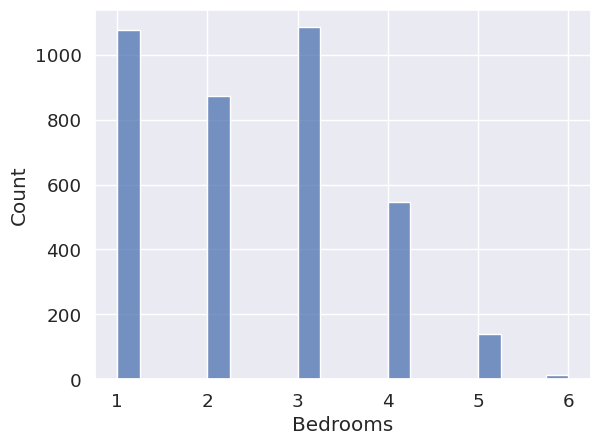

In [ ]:
# Bedrooms
sns.histplot(x='Bedrooms', data = df_srx_condo);

<Axes: xlabel='Size', ylabel='Density'>

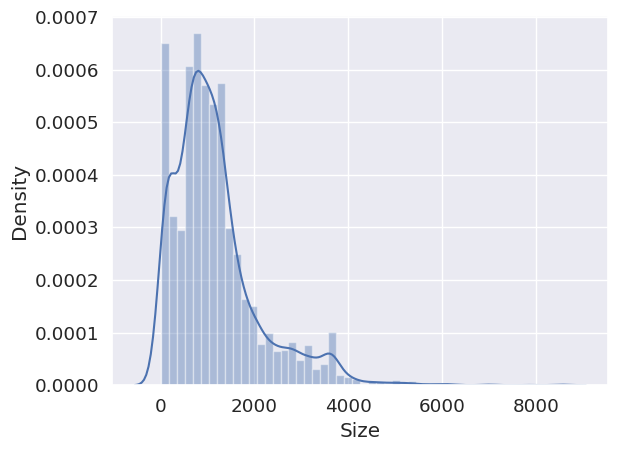

In [ ]:
# Size
sns.distplot(df_srx_condo['Size'])

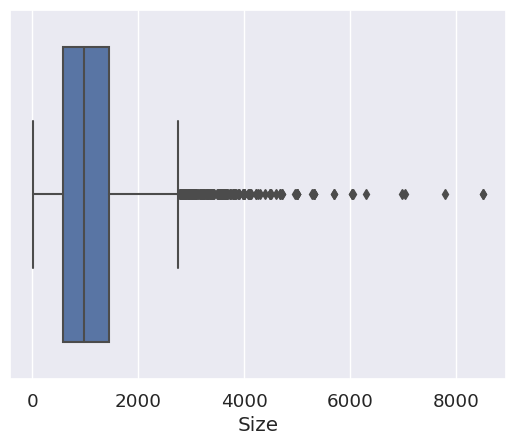

In [ ]:
sns.boxplot(x=df_srx_condo['Size']);

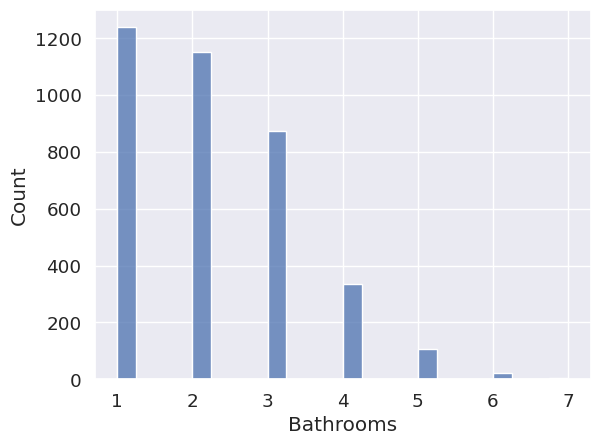

In [ ]:
# Bathrooms
sns.histplot(x='Bathrooms', data = df_srx_condo);

<Axes: xlabel='Primary Schools', ylabel='Density'>

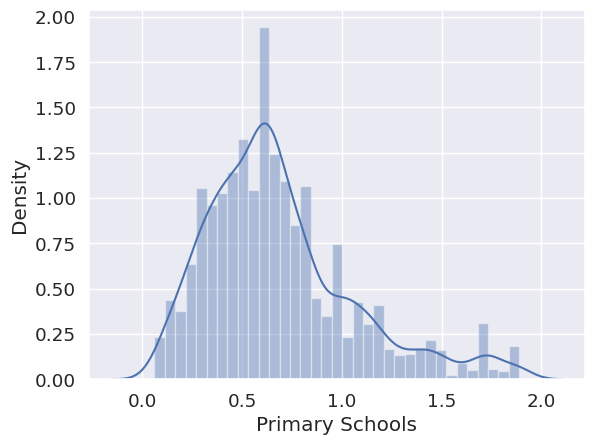

In [ ]:
# Primary schools, groceries, shopping malls
sns.distplot(df_srx_condo['Primary Schools'])

<Axes: xlabel='Groceries & Supermarts', ylabel='Density'>

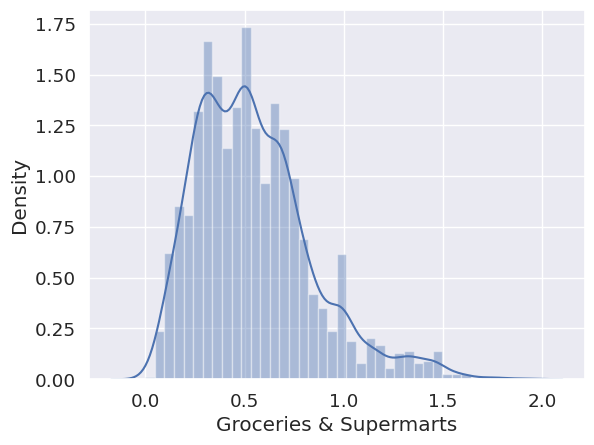

In [ ]:
sns.distplot(df_srx_condo['Groceries & Supermarts'])

<Axes: xlabel='Shopping Malls', ylabel='Density'>

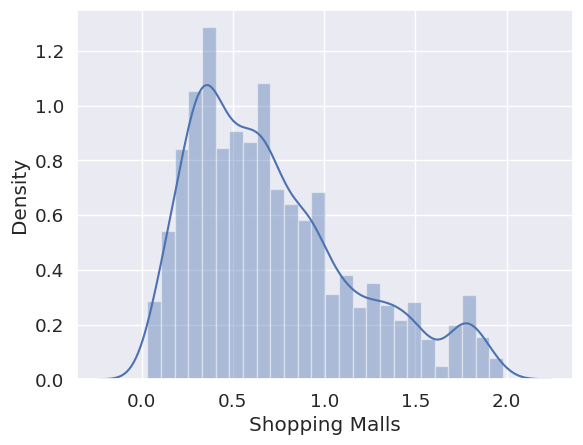

In [ ]:
sns.distplot(df_srx_condo['Shopping Malls'])